In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import sklearn

import matplotlib
import matplotlib.pyplot as plt

In [9]:
# Ch. 12 Question Tests

def q3test():
    t1 = tf.range(10)
    t2 = tf.constant(np.arange(10))
    
    print(t1)
    print(t2)
    
    is_equal = (t1 == t2)
    
    print(is_equal)
    
    return t1, t2, is_equal

def q12test(layernormalization):  # layernormalization - custom keras layer
    # fake dataset
    X = tf.constant([[1, 2, 3, 4],
                     [5, 6, 7, 8]], dtype=tf.float32)
    
    print(X)

    X_layernormed = tf.keras.layers.LayerNormalization()(X)
    X_layernormed_custom = layernormalization(X)
    
    print(X_layernormed)
    print(X_layernormed_custom)
    
    return X_layernormed, X_layernormed_custom

In [3]:
# Testing Cell

q3test()

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([ True  True  True  True  True  True  True  True  True  True], shape=(10,), dtype=bool)


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(10,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])>)

# Chapter 12 Exercises
1.) TensorFlow is a deep learning framework and library that spans across multiple languages such as python, javascript, java, C++, and C#. Other popular Deep Learning frameworks are PyTorch, Theano, MXNET, Caffe, and more.

2.) TensorFlow is not a drop-in replacement for NumPy. TensorFlow is a deep learning framework and library, while NumPy is a linear algebra library. The main differences between NumPy ndarray and TensorFlow Tensor are that Tensors are optimized to work with hardware and GPU acceleration and the TF Graph

3.) Yes

4.) Queue, Graph, RaggedTensor, String, TensorArray, Set

5.) Use the regular function for most cases. If you need to have it dependent on the internals of the model/layers (like for regularization for example), subclass it.

6.) In most cases, just use the regular function. If you need to have the metric dependent on model internals or need it to occur in a different way (such as not using the mean), subclass it.

7.) Custom layer should be used when the layer could be repeated many times in the model (like a convolution block having conv then pool). Custom model should be made (subclassed) when you have some crazy architecture shit you wanna do

8.) Some use cases that require writing a custom training loop: 
    - If you wanna do some crazy shit like use multiple optimizers
    - Anything that can't be covered well by a regular training loop

9.) They can contain arbitrary Python code, but it won't work as one might expect if one uses external library calls that can be replaced with a tf function (such as numpy). Instead, the python code will only run during tracing (which might be what you want, even if that is unlikely). Otherwise, it is a really good idea to just use TF functions. If you absolutely have to have the arbitrary python code that has external library calls, then you can wrap it in `tf.py_function()`

10.) 
    - Refer to Question 9: External Library calls will only run during tracing, 
    - Use mainly tf functions, especially with loops
    - Allow source code to be available to TF
    - Vectorize
    - If function creates a TF stateful object, it can only do it on the very first call. If you want to assign a new value to a variable, use `assign()` rather than `=`

11.) When the model needs to be modified at runtime. Not all models should be dynamic, as they are slower

In [10]:
# Q12

"""
This is meant to be a clone of tf.keras.layers.LayerNormalization. How is this different from BatchNormalization?
While BatchNormalization does it across an entire mini batch, LayerNormalization does it across all the dimensions, or neurons, in that layer

Note: this will be tested in one of the following exercises
"""

import tensorflow.keras.backend as K

class LayerNormalization(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.epsilon = K.epsilon()
    
    def build(self, input_shape):  # input_shape is of the batch
        self.alpha = self.add_weight(shape=input_shape[-1:],
                                     dtype=tf.float32,
                                     initializer="ones",
                                     trainable=True)
        self.beta = self.add_weight(shape=input_shape[-1:],
                                     dtype=tf.float32,
                                     initializer="zeros",
                                     trainable=True)
    
    def call(self, inputs):
        (mean, variance) = tf.nn.moments(inputs, axes=-1, keepdims=True)
        
        std = tf.math.sqrt(variance)
        
        standardized_inputs = (inputs - mean) / (std + self.epsilon)
        
        return (self.alpha * standardized_inputs) + self.beta
    
    
# Testing time
q12test(LayerNormalization())

tf.Tensor(
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[-1.3411044 -0.4470348  0.4470348  1.3411044]
 [-1.3411044 -0.4470348  0.4470348  1.3411044]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[-1.3416406  -0.44721353  0.44721353  1.3416406 ]
 [-1.3416406  -0.44721353  0.44721353  1.3416406 ]], shape=(2, 4), dtype=float32)


(<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[-1.3411044, -0.4470348,  0.4470348,  1.3411044],
        [-1.3411044, -0.4470348,  0.4470348,  1.3411044]], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[-1.3416406 , -0.44721353,  0.44721353,  1.3416406 ],
        [-1.3416406 , -0.44721353,  0.44721353,  1.3416406 ]],
       dtype=float32)>)

In [11]:
'''
Result: Close enough!
'''

'\nResult: Close enough!\n'

In [93]:
# Helper functions for Q13

def tensorfy(X, y, dtype=tf.float32):
    X_tensor = tf.convert_to_tensor(X, dtype=dtype)
    y_tensor = tf.convert_to_tensor(y, dtype=dtype)
    
    return (X, y)

def square_img_classification_model(IMG_SIZE, NUM_CLASSES,
                                    FC_UNITS=100, LAST_CONV_ACTIVATION=Activation("swish")):
    conv1_units = 32
    conv2_units = conv1_units * 2
    conv2_flattened_dim = conv2_units * ((IMG_SIZE - 2)**2)
    
    # LAYERS
    input_layer = Input(shape=(IMG_SIZE, IMG_SIZE))

    flattened_input = Flatten()(input_layer)
    flattened_input = BatchNormalization()(flattened_input)

    encode = Dense(IMG_SIZE*IMG_SIZE, use_bias=False)(flattened_input)
    encode = Reshape(target_shape=(IMG_SIZE, IMG_SIZE, 1))(encode)

    conv1 = Conv2D(conv1_units, kernel_size=(2, 2), padding="same", strides=(1, 1))(encode)
    conv1 = Activation("relu")(conv1)

    conv2 = Conv2D(conv2_units, kernel_size=(3, 3), padding="valid", strides=(1, 1), use_bias=False)(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LAST_CONV_ACTIVATION(conv2)
    
    # flatten conv2
    conv2_flattened = Flatten()(conv2)

    # SE portion
    SE2 = GlobalAveragePooling2D()(conv2)
    SE2 = Dense(FC_UNITS, activation="relu", kernel_initializer="he_normal")(SE2)
    SE2 = Dense(conv2_flattened_dim, activation="sigmoid", kernel_initializer="glorot_uniform")(SE2)  # logic gate

    # combine
    fc1_in = Multiply()([SE2, conv2_flattened])

    fc1 = Dense(FC_UNITS, kernel_initializer="he_uniform")(fc1_in)
    fc1 = BatchNormalization()(fc1)
    fc1 = PReLU()(fc1)
    
    fc2 = Dense(units=max(1, int(0.75 * FC_UNITS)), use_bias=False)(fc1)
    fc2 = BatchNormalization()(fc2)
    fc2 = Activation("elu")(fc2)

    output_layer = Dense(NUM_CLASSES, activation="linear")(fc2)

    return tf.keras.Model(inputs=[input_layer], outputs=[output_layer])


def print_status_bar(iteration, total_iterations_per_epoch, metrics=[]):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result()) for m in metrics])
    end = "" if iteration < total_iterations_per_epoch else "\n"
    
    print("\r{}/{} - ".format(iteration, total_iterations_per_epoch) + metrics, end=end)


In [96]:
# variation architectures
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1

def square_img_classification_model_experimental(IMG_SIZE, NUM_CLASSES,
                                                 FC_UNITS=100, LAST_CONV_ACTIVATION=Activation("swish")):
    conv1_units = 32
    conv2_units = conv1_units * 2
    conv2_flattened_dim = conv2_units * ((IMG_SIZE - 2)**2)
    
    FC_UNITS_2 = max(1, int(0.75 * FC_UNITS))
    
    # LAYERS
    input_layer = Input(shape=(IMG_SIZE, IMG_SIZE))

    flattened_input = Flatten()(input_layer)
    flattened_input = BatchNormalization()(flattened_input)

    encode = Dense(IMG_SIZE*IMG_SIZE, use_bias=False, activation="linear")(flattened_input)
    encode_reshaped = Reshape(target_shape=(IMG_SIZE, IMG_SIZE, 1))(encode)

    conv1 = Conv2D(conv1_units, kernel_size=(2, 2), padding="same", strides=(1, 1))(encode_reshaped)
    conv1 = Activation("relu")(conv1)

    conv2 = Conv2D(conv2_units, kernel_size=(3, 3), padding="valid", strides=(1, 1), use_bias=False)(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LAST_CONV_ACTIVATION(conv2)
    
    # flatten conv2
    conv2_flattened = Flatten()(conv2)

    # SE portion
    SE2 = GlobalAveragePooling2D()(conv2)
    SE2 = Dense(FC_UNITS, activation="relu", kernel_initializer="he_normal")(SE2)
    SE2 = Dense(conv2_flattened_dim, activation="sigmoid", kernel_initializer="glorot_uniform")(SE2)  # logic gate

    # combine
    fc1_in = Multiply()([SE2, conv2_flattened])

    fc1 = Dense(FC_UNITS, kernel_initializer="he_uniform", use_bias=False)(fc1_in)
    fc1 = BatchNormalization()(fc1)
    fc1 = PReLU()(fc1)
    
    fc2 = Dense(FC_UNITS_2, use_bias=False)(fc1)
    fc2 = BatchNormalization()(fc2)
    fc2 = Activation("swish")(fc2)
    
    fc3 = Dense(FC_UNITS_2, kernel_regularizer=l1(0.01))(layers.concatenate([fc2, conv2_flattened, encode]))
    fc3 = Activation("gelu")(fc3)

    output_layer = Dense(NUM_CLASSES, activation="linear")(layers.concatenate([fc2, fc3]))

    return tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [90]:
# Q13 (a)
from tensorflow import keras
from tensorflow.data import Dataset
from keras.layers import Input, Flatten, Reshape, Multiply
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Activation, PReLU
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

assert X_train.shape == (60000, IMG_SIZE, IMG_SIZE)
assert X_test.shape == (10000, IMG_SIZE, IMG_SIZE)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(labels)
assert num_classes == 10

# divide by max value
X_train = X_train / 255
X_test = X_test / 255

# create a validation set
val_ratio = len(y_test) / len(y_train)
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=val_ratio)

# convert to tensors
(X_train, y_train) = tensorfy(X_train, y_train)
(X_val, y_val) = tensorfy(X_val, y_val)
(X_test, y_test) = tensorfy(X_test, y_test)

# one hot encode outputs
y_train = tf.one_hot(y_train, depth=num_classes)
y_val = tf.one_hot(y_val, depth=num_classes)
y_test = tf.one_hot(y_test, depth=num_classes)

def make_and_prepare_dataset(X, y, batch_size, prefetch=True, buffer_size=2000):  # we want the buffer size to be bigger than batch size
    dataset_X = Dataset.from_tensor_slices(X)
    dataset_y = Dataset.from_tensor_slices(y)
    
    # combine
    dataset = Dataset.zip((dataset_X, dataset_y))
    
    # prepare
    dataset = (dataset
                .shuffle(buffer_size=buffer_size)
                .batch(batch_size)
                .prefetch(tf.data.experimental.AUTOTUNE))
    
    return dataset

def train_model(model, X_y: tuple, Xval_yval: tuple, 
                loss, optimizer, metrics=[],
                epochs=1, batch_size=32, starting_epoch=1):
    (X, y) = X_y
    (X_val, y_val) = Xval_yval
    
    '''
    An epoch is when it sees ALL the examples in training set regardless of batch size
    So with Batch Gradient Descent, 1 epoch = 1 iteration
    ''' 
    ending_epoch = starting_epoch + epochs - 1
    steps_per_epoch = len(X) // batch_size  
    #total_steps = epochs * steps_per_epoch

    train_set = make_and_prepare_dataset(X, y, batch_size)
    val_set = make_and_prepare_dataset(X_val, y_val, batch_size)
    val_set_length = len(val_set)
    
    average_train_cost = keras.metrics.Mean("average cost")
    average_val_cost = keras.metrics.Mean("average val cost")
    
    all_metrics = [average_train_cost, average_val_cost]
    for metric in metrics:
        all_metrics.append(metric)
    
    def forward_pass(X, y):
        yhat = model(X, training=True)
        costs = tf.reduce_mean(loss(y, yhat))
        
        return (yhat, costs)
    
    for epoch in range(starting_epoch, ending_epoch + 1):
        print(f"Epoch {epoch}/{ending_epoch}")
        step = 0
        
        for (X_minibatch, y_minibatch) in train_set.take(steps_per_epoch):
            random_val_index = int(np.random.rand() * val_set_length)
            (X_val_minibatch, y_val_minibatch) = iter(val_set.skip(random_val_index)).get_next()
            with tf.GradientTape() as tape:
                # TAPE THE FORWARD PASS (RECORD)
                yhat, costs = forward_pass(X_minibatch, y_minibatch)
            
            # NOW FOR THE BACKWARD PASS
            gradients = tape.gradient(costs, model.trainable_variables)           # backpropagation
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # LEARNING STEP!!!
            
            # Validation Forward Pass
            yhat_val, costs_val = forward_pass(X_val_minibatch, y_val_minibatch)
            
            # Average Costs for this learning step (update states)
            average_train_cost(costs)   # before learning step
            average_val_cost(costs_val) # after learning step
            
            # Calculate training metrics
            for metric in metrics:
                metric(y_minibatch, yhat)
            
            step += 1
            print_status_bar(step, steps_per_epoch, all_metrics)
            
            for metric in all_metrics:
                metric.reset_states()
        print()

# Create Model
model = square_img_classification_model(IMG_SIZE=28, NUM_CLASSES=num_classes)

# Instead of compiling and fitting, we are training manually
loss = CategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=0.01)
metrics = [keras.metrics.MeanAbsoluteError()]

train_model(model, (X_train, y_train), (X_val, y_val), 
            loss, optimizer, metrics,
            epochs=10, batch_size=64)

Epoch 1/10
781/781 - average cost: 0.3868 - average val cost: 0.4569 - mean_absolute_error: 2.7571

Epoch 2/10
781/781 - average cost: 0.2596 - average val cost: 0.4660 - mean_absolute_error: 2.9585

Epoch 3/10
781/781 - average cost: 0.4584 - average val cost: 0.5510 - mean_absolute_error: 2.8548

Epoch 4/10
781/781 - average cost: 0.4001 - average val cost: 0.3835 - mean_absolute_error: 3.0699

Epoch 5/10
781/781 - average cost: 0.4145 - average val cost: 0.2005 - mean_absolute_error: 3.2152

Epoch 6/10
781/781 - average cost: 0.3652 - average val cost: 0.3629 - mean_absolute_error: 3.3460

Epoch 7/10
781/781 - average cost: 0.0995 - average val cost: 0.4516 - mean_absolute_error: 3.3317

Epoch 8/10
781/781 - average cost: 0.3108 - average val cost: 0.2723 - mean_absolute_error: 3.4423

Epoch 9/10
781/781 - average cost: 0.1028 - average val cost: 0.3733 - mean_absolute_error: 3.5038

Epoch 10/10
781/781 - average cost: 0.1188 - average val cost: 0.2389 - mean_absolute_error: 3.4172


In [99]:
# Q13 (b)
# Using a different optimizer for the lower layers

def train_crazy_model(crazy_model, X_y: tuple, Xval_yval: tuple,
                      loss, optimizers=[], metrics=[],
                      epochs=1, batch_size=32, starting_epoch=1):
    (X, y) = X_y
    (X_val, y_val) = Xval_yval
    
    num_optimizers = len(optimizers)
    
    '''
    An epoch is when it sees ALL the examples in training set regardless of batch size
    So with Batch Gradient Descent, 1 epoch = 1 iteration
    ''' 
    ending_epoch = starting_epoch + epochs - 1
    steps_per_epoch = len(X) // batch_size  
    #total_steps = epochs * steps_per_epoch

    train_set = make_and_prepare_dataset(X, y, batch_size)
    val_set = make_and_prepare_dataset(X_val, y_val, batch_size)
    val_set_length = len(val_set)
    
    average_train_cost = keras.metrics.Mean("average cost")
    average_val_cost = keras.metrics.Mean("average val cost")
    
    all_metrics = [average_train_cost, average_val_cost]
    for metric in metrics:
        all_metrics.append(metric)
        
    def forward_pass(X, y):
        yhat = crazy_model(X)
        costs = tf.reduce_mean(loss(y, yhat))
        
        return yhat, costs
    
    for epoch in range(starting_epoch, ending_epoch+1):
        print(f"Epoch {epoch}/{ending_epoch}")
        step = 0
        
        for (X_minibatch, y_minibatch) in train_set.take(steps_per_epoch):
            random_val_index = int(np.random.rand() * val_set_length)
            (X_val_minibatch, y_val_minibatch) = iter(val_set.skip(random_val_index)).get_next()
            
            with tf.GradientTape() as tape:
                # Forward Pass
                yhat, costs = forward_pass(X_minibatch, y_minibatch)
            
            # Backpropagation
            gradients = tape.gradient(costs, crazy_model.trainable_variables)
            
            # Learn
            optimizer = optimizers[int(np.random.rand() * num_optimizers)]
            optimizer.apply_gradients(zip(gradients, crazy_model.trainable_variables))
            
            # Validation Forward Pass
            yhat_val, costs_val = forward_pass(X_val_minibatch, y_val_minibatch)
            
            # Average Costs for this learning step (update states)
            average_train_cost(costs)   # before learning step
            average_val_cost(costs_val) # after learning step
            
            # Calculate training metrics
            for metric in metrics:
                metric(y_minibatch, yhat)
            
            step += 1
            print_status_bar(step, steps_per_epoch, all_metrics)
            
            for metric in all_metrics:
                metric.reset_states()
        print()

crazy_model = square_img_classification_model(IMG_SIZE=28, NUM_CLASSES=num_classes)

loss = CategoricalCrossentropy(from_logits=True)
optimizers = [Adam(learning_rate=0.005), keras.optimizers.SGD(learning_rate=0.008), keras.optimizers.Nadam(learning_rate=0.001)]
metrics = [keras.metrics.MeanAbsoluteError()]

train_crazy_model(crazy_model, (X_train, y_train), (X_val, y_val), 
                  loss, optimizers, metrics,
                  epochs=10, batch_size=64)

Epoch 1/10
781/781 - average cost: 0.2446 - average val cost: 0.3510 - mean_absolute_error: 3.0260

Epoch 2/10
781/781 - average cost: 0.3377 - average val cost: 0.3659 - mean_absolute_error: 3.4326

Epoch 3/10
781/781 - average cost: 0.3190 - average val cost: 0.5703 - mean_absolute_error: 3.7836

Epoch 4/10
781/781 - average cost: 0.3369 - average val cost: 0.4635 - mean_absolute_error: 3.5231

Epoch 5/10
781/781 - average cost: 0.1789 - average val cost: 0.4834 - mean_absolute_error: 3.4863

Epoch 6/10
781/781 - average cost: 0.2113 - average val cost: 0.2553 - mean_absolute_error: 3.5692

Epoch 7/10
641/781 - average cost: 0.3618 - average val cost: 0.2919 - mean_absolute_error: 3.9494

KeyboardInterrupt: 

Epoch 1/10
782/782 [==============================] - 82s 104ms/step - loss: 0.0073 - mean_absolute_error: 5.8910 - val_loss: 0.5769 - val_mean_absolute_error: 6.0793
Epoch 2/10
782/782 [==============================] - 82s 105ms/step - loss: 0.0037 - mean_absolute_error: 6.1292 - val_loss: 0.6150 - val_mean_absolute_error: 6.2801
Epoch 3/10
782/782 [==============================] - 81s 103ms/step - loss: 0.0028 - mean_absolute_error: 6.3264 - val_loss: 0.6351 - val_mean_absolute_error: 6.3959
Epoch 4/10
782/782 [==============================] - 81s 103ms/step - loss: 0.0032 - mean_absolute_error: 6.4833 - val_loss: 0.6707 - val_mean_absolute_error: 6.6781
Epoch 5/10
782/782 [==============================] - 80s 102ms/step - loss: 0.0026 - mean_absolute_error: 6.6330 - val_loss: 0.6774 - val_mean_absolute_error: 6.7466
Epoch 6/10
782/782 [==============================] - 80s 102ms/step - loss: 0.0030 - mean_absolute_error: 6.7336 - val_loss: 0.6920 - val_mean_absolute_error: 6.751

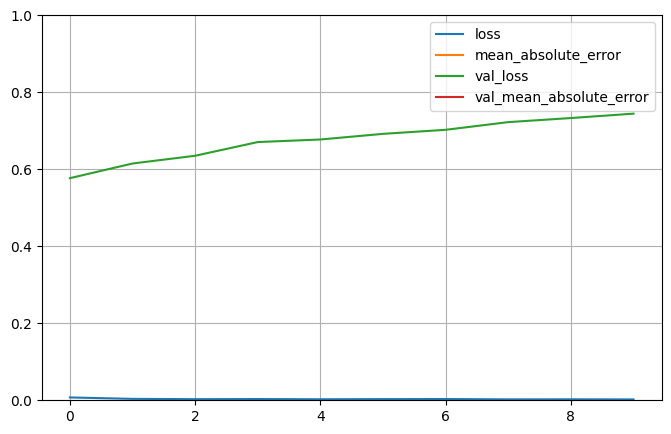

In [98]:
# Q13 (a) in Keras
model_keras = square_img_classification_model_experimental(IMG_SIZE=28, NUM_CLASSES=num_classes)

model.compile(loss=loss, optimizer=Adam(learning_rate=0.001), metrics=metrics)

model_history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Plot history
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()